In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.nddata import CCDData
from glob import glob
import os
from astropy.visualization import ZScaleInterval, ImageNormalize
from astropy.convolution import Gaussian2DKernel,Gaussian1DKernel, convolve, convolve_fft
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from ccdproc import ImageFileCollection
import cmcrameri.cm as cmcm
import h5py
import copy
from scipy import ndimage

In [2]:
with h5py.File("../../sav/Eclipse/Bias/master_bias_dc_red_1s_proto.h5", 'r') as hf:
    bias_dc_red_1s = hf['image'][:]

with h5py.File("../../sav/Eclipse/Bias/master_bias_dc_red_5s_proto.h5", 'r') as hf:
    bias_dc_red_5s = hf['image'][:]

In [4]:
red_path = "/Users/yjzhu/Desktop/Solar/Eclipse2017/src/EclipseSpectra2017/MikesData/VaderEclipseDayRed2017aug21/"
fname_skyflat_red_5s = ["SkyRed5s_6227.fit","SkyRed5s_6228.fit","SkyRed5s_6229.fit","SkyRed5s_6230.fit",
                        "SkyRed5s_6231.fit","SkyRed5s_6232.fit","SkyRed5s_6233.fit","SkyRed5s_6234.fit",
                        "SkyRed5s_6235.fit","SkyRed5s_6236.fit","SkyRed5s_6237.fit","SkyRed5s_6238.fit",
                        "SkyRed5s_6239.fit","SkyRed5s_6240.fit","SkyRed5s_6241.fit"]

In [5]:
flat_im_collection = ImageFileCollection(red_path,filenames=fname_skyflat_red_5s)
flat_im_df = flat_im_collection.summary.to_pandas()

In [6]:
flat_im_df

,file,simple,bitpix,naxis,naxis1,naxis2,bzero,bscale,datamin,datamax,...,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,xpossubf,ypossubf,cblack,cwhite,swcreate
0,SkyRed5s_6227.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,938,20108,Artemis Capture
1,SkyRed5s_6228.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,939,20038,Artemis Capture
2,SkyRed5s_6229.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,940,20050,Artemis Capture
3,SkyRed5s_6230.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,940,20034,Artemis Capture
4,SkyRed5s_6231.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,938,19979,Artemis Capture
5,SkyRed5s_6232.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,938,20009,Artemis Capture
6,SkyRed5s_6233.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,938,19907,Artemis Capture
7,SkyRed5s_6234.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,939,19898,Artemis Capture
8,SkyRed5s_6235.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,938,19908,Artemis Capture
9,SkyRed5s_6236.fit,True,16,2,1392,1040,32768.0,1.0,0.0,65535.0,...,6.45,1,1,0,0,0,0,940,19987,Artemis Capture


In [8]:
flat_image_cube = np.zeros((1040,1392,15))

for ii, row_ in flat_im_df.iterrows():
    flat_image_cube[:,:,ii] = CCDData.read(os.path.join(red_path,row_["file"]),unit="adu").data - bias_dc_red_5s

flat_im_aver = np.mean(flat_image_cube,axis=2)

Text(0, 0.5, '')

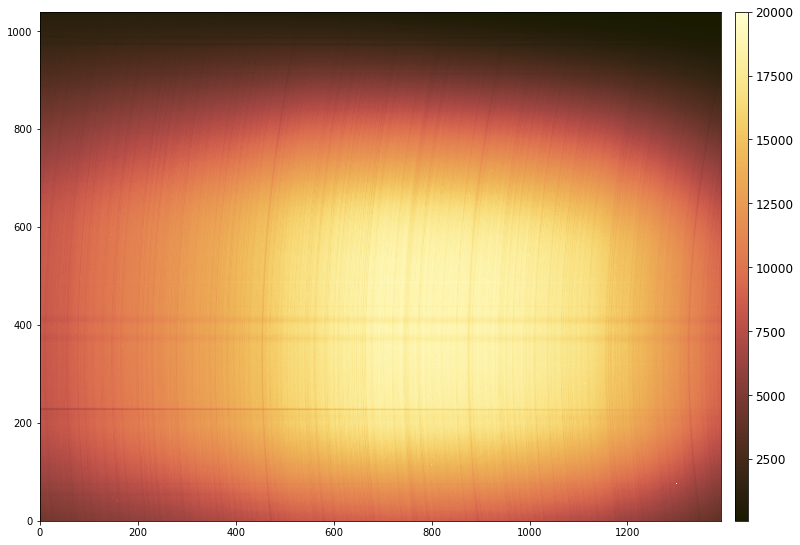

In [10]:
fig, ax = plt.subplots(figsize=(10,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(1392),np.arange(1040),flat_im_aver,cmap=cmcm.lajolla_r, rasterized=True,vmax=2e4)
#plt.colorbar(im)
ax.axis("scaled")
clb_ax = inset_axes(ax,width="2%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=12)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

In [11]:
with h5py.File("../../sav/Eclipse/Curvature/master_curvature_red.h5", 'r') as hf:
    xpos_map_coordinate = hf['xpos_map_coordinate'][:]
    xstart_pixel = hf['xpos_map_coordinate'].attrs['xstart_pixel']
    xend_pixel = hf['xpos_map_coordinate'].attrs['xend_pixel']

    ypos_map_coordinate = hf['ypos_map_coordinate'][:]
    ystart_pixel = hf['ypos_map_coordinate'].attrs['ystart_pixel']
    yend_pixel = hf['ypos_map_coordinate'].attrs['yend_pixel']


In [12]:
testx_slice_mapcoor = slice(xstart_pixel,xend_pixel)
testy_slice_mapcoor = slice(ystart_pixel,yend_pixel)
flat_trans_mapcoor = ndimage.map_coordinates(flat_im_aver[testy_slice_mapcoor, testx_slice_mapcoor],(ypos_map_coordinate, xpos_map_coordinate),
                                                order=1)

Text(0, 0.5, '')

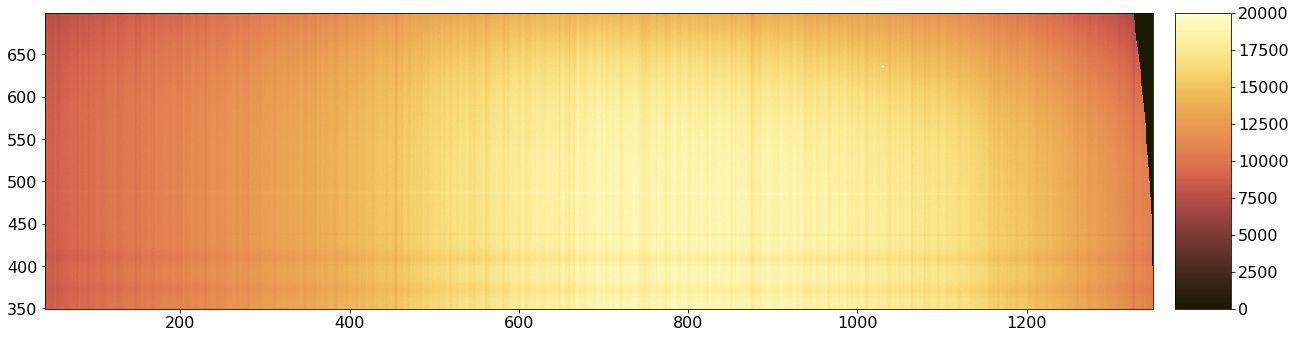

In [13]:
fig, ax = plt.subplots(figsize=(16,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(testx_slice_mapcoor.start,testx_slice_mapcoor.stop),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor,vmax=2e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
ax.axis("scaled")
clb_ax = inset_axes(ax,width="5%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

Text(0, 0.5, '')

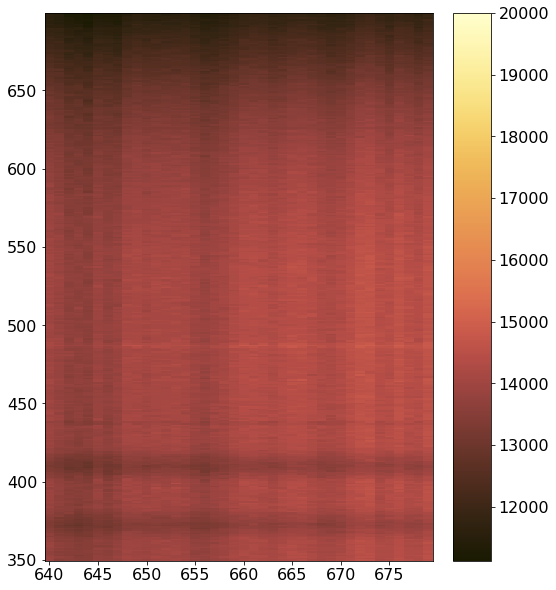

In [15]:
fig, ax = plt.subplots(figsize=(6,8),constrained_layout=True)
im = ax.pcolormesh(np.arange(640,680),np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop),
            flat_trans_mapcoor[:,380 - xstart_pixel:420 - xstart_pixel],vmax=2e4,cmap=cmcm.lajolla_r,rasterized=True)
ax.tick_params(labelsize=16)
# ax.axis("scaled")
clb_ax = inset_axes(ax,width="10%",height= "100%",loc='lower left',
                bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0)
clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
clb_ax.tick_params(labelsize=16)
clb_ax.yaxis.get_offset_text().set_fontsize(16)
clb_ax.set_ylabel('',fontsize=16)

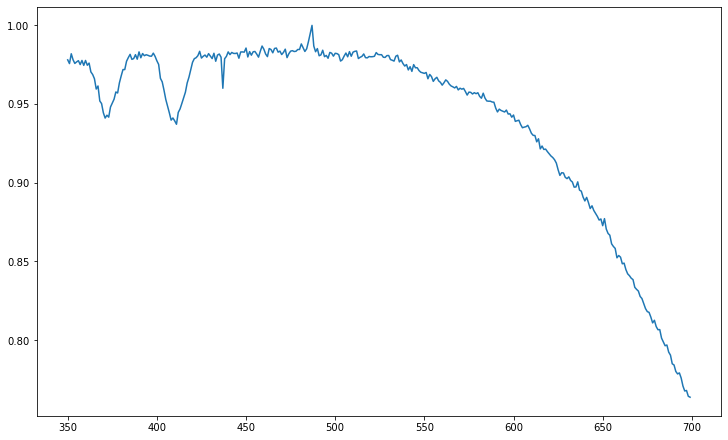

In [16]:
flatfield_slicex_1 = slice(651 - xstart_pixel, 655 - xstart_pixel)
flatfield_slicex_2 = slice(659 - xstart_pixel, 663 - xstart_pixel)
flatfield_slicex_3 = slice(665 - xstart_pixel, 667 - xstart_pixel)
sample_flatfield_y = np.average(flat_trans_mapcoor[:,np.r_[flatfield_slicex_1,flatfield_slicex_2,flatfield_slicex_3]],axis=1)
sample_flatfield_y = sample_flatfield_y/sample_flatfield_y.max()

fig, ax = plt.subplots(figsize=(10,6),constrained_layout=True)
ax.plot(np.arange(testy_slice_mapcoor.start,testy_slice_mapcoor.stop), sample_flatfield_y)

In [17]:
with h5py.File("../../sav/Eclipse/FlatField/skyflat_red_1d_FeX_52nd.h5", 'w') as hf:
    df_flatfield_1d = hf.create_dataset("flatfield_1d",  data=sample_flatfield_y)
    df_flatfield_1d.attrs["ystart_pixel"] = ystart_pixel
    df_flatfield_1d.attrs["yend_pixel"] = yend_pixel